<a href="https://colab.research.google.com/github/eveliniya/Shopping-Behavior-EDA/blob/main/shopping_Behavior_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory data analysis in shopping behavior:**

---
### **מגישות העבודה:**
* **אנה מריה יצוק** (ת.ז: 334069051)
* **נירית אשרף** (ת.ז: 211824933)
* **אוולין משטקוב** (ת.ז: 323006510)
---


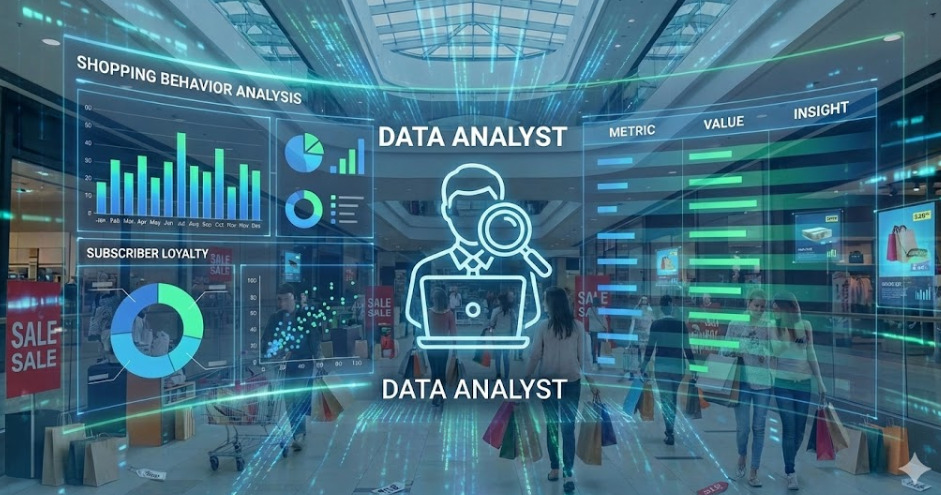

# **Introduction**: Customer Shopping Behavior Analysis


**1. What is Exploratory Data Analysis (EDA)?**
EDA is the process of analyzing data sets to summarize their main characteristics, often using visual methods like Histograms and Box Plots. This step is crucial for understanding the data before applying any Machine Learning models.

**2. Dataset Overview**
We are working with a comprehensive dataset on **Consumer Shopping Behavior**. It contains **3,900 rows and 18 columns**, providing detailed information about customers, including their Age, Purchase Amount, and Subscription Status for a retail company operating in the United States.

**3. Business Problem & Goal**
The company invests significant resources in its "Subscription Model" to foster customer loyalty. However, it is unclear if this model is effective.
* **The Goal:** To analyze the data and provide actionable insights on whether to expand or modify the subscription strategy.
* **Key Research Questions:**
    * Do subscribers spend more on average?
    * Which product categories do they prefer?
    * Are subscribers more satisfied (higher ratings) than regular customers?



---



##  Importing the required libraries for EDA

Below are the libraries that are used in order to perform EDA (Exploratory data analysis) .

In [ ]:
# Importing necessary library
import pandas as pd
%matplotlib inline



---



## A. Loading & Displaying Data
In this step, we load the dataset into a Pandas DataFrame using the `read_csv` function. This allows us to manipulate and analyze the data effectively.
After loading, we display the first few rows (`head`) and the last few rows (`tail`) to verify that the data has been imported correctly and understand its structure.

In [ ]:
df = pd.read_csv("/content/shopping_behavior_updated.csv")
# 1. Display Top 3 rows
print("--- Top 3 Rows ---")
display(df.head(3))
# 2. Display Bottom 3 rows
print("\n--- Bottom 3 Rows  ---")
display(df.tail(3))
# 3. Display 5 Random rows
print("\n--- 5 Random Rows  ---")
display(df.sample(5))

--- Top 3 Rows ---


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly



--- Bottom 3 Rows  ---


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly



--- 5 Random Rows  ---


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
433,434,49,Male,Skirt,Clothing,92,Alabama,M,Orange,Fall,3.2,Yes,Store Pickup,Yes,Yes,23,Credit Card,Fortnightly
649,650,53,Male,Pants,Clothing,93,Delaware,L,Orange,Spring,4.2,Yes,Store Pickup,Yes,Yes,33,PayPal,Every 3 Months
2982,2983,33,Female,Dress,Clothing,45,Wisconsin,M,Orange,Summer,3.6,No,Store Pickup,No,No,4,Credit Card,Weekly
3352,3353,55,Female,Belt,Accessories,96,Washington,M,Teal,Summer,2.9,No,Next Day Air,No,No,7,Bank Transfer,Bi-Weekly
1307,1308,23,Male,Coat,Outerwear,32,Missouri,L,Black,Summer,3.1,No,Express,Yes,Yes,43,PayPal,Annually




---



##  Checking the types of data

It is essential to check the data types of our columns to ensure they are in the correct format for analysis. For example, we need to ensure that variables like Age and Purchase Amount are numerical so we can perform calculations on them.
* **Numerical features:** Age, Purchase Amount (USD), Review Rating, Previous Purchases.
* **Categorical features:** Gender, Item Purchased, Category, Location, Size, Color, etc.

In [ ]:
df.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Item Purchased,object
Category,object
Purchase Amount (USD),int64
Location,object
Size,object
Color,object
Season,object


## B. Dropping the duplicate rows

Duplicate data can skew our analysis and lead to incorrect conclusions. We checked the dataset for duplicate rows.

Initial Shape: (3900, 18)


In [ ]:
df.shape

(3900, 18)

In [ ]:
# Count duplicates
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows before cleaning: {duplicates_count}")
# Drop duplicates (even if count is 0)
df = df.drop_duplicates()
# Verify
print(f"Shape of dataset after handling duplicates: {df.shape}")

Number of duplicate rows before cleaning: 0
Shape of dataset after handling duplicates: (3900, 18)


**Observation:**
As seen below, we found **0 duplicate rows** in the dataset. Therefore, no data was removed.

##C. Renaming the columns

Clear column names are important for readability. While our original dataset has relatively clear names, we can simplify them for easier coding and plotting. For instance, we can rename Purchase Amount (USD) to simply Price or Amount, and Review Rating to Rating. This makes the code cleaner and the charts easier to read.

**Note: Verifying Data Types after Renaming**
After renaming the columns, it is good practice to inspect the dataframe again. This ensures that the new column names are correctly applied and that the data types remain consistent for our analysis.

In [ ]:
df = df.rename(columns={
    "Purchase Amount (USD)": "Price",
    "Review Rating": "Rating",
    "Subscription Status": "Subscription",
    "Previous Purchases": "Prev_Purchases",
    "Promo Code Used": "Promo_Code",
    "Item Purchased": "Item",
    "Shipping Type": "Shipping"
})
df.head(5)

,Customer ID,Age,Gender,Item,Category,Price,Location,Size,Color,Season,Rating,Subscription,Shipping,Discount Applied,Promo_Code,Prev_Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## D. Dropping irrelevant columns

To ensure our analysis remains focused on the core business problem—evaluating the effectiveness of the Subscription Model—we removed variables that are considered external factors (such as Season, Location, and Payment Method).

By filtering out these features, we reduce dataset noise and direct our attention specifically to customer spending habits, product preferences, and satisfaction levels directly linked to their subscription status

In [ ]:
df = df.drop(['Customer ID','Color','Size','Season','Location','Payment Method',], axis=1)
df.head(5)

,Age,Gender,Item,Category,Price,Rating,Subscription,Shipping,Discount Applied,Promo_Code,Prev_Purchases,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,3.1,Yes,Express,Yes,Yes,14,Fortnightly
1,19,Male,Sweater,Clothing,64,3.1,Yes,Express,Yes,Yes,2,Fortnightly
2,50,Male,Jeans,Clothing,73,3.1,Yes,Free Shipping,Yes,Yes,23,Weekly
3,21,Male,Sandals,Footwear,90,3.5,Yes,Next Day Air,Yes,Yes,49,Weekly
4,45,Male,Blouse,Clothing,49,2.7,Yes,Free Shipping,Yes,Yes,31,Annually




---



In [ ]:
df.count()      # Used to count the number of rows

,0
Age,3900
Gender,3900
Item,3900
Category,3900
Price,3900
Rating,3900
Subscription,3900
Shipping,3900
Discount Applied,3900
Promo_Code,3900




---



## D. Dropping the missing or null values.

Missing values (NaN) can cause errors in machine learning models and visualizations. We inspected the dataset for null values.

Result: The dataset is exceptionally clean, with 0 missing values in all columns. This means we do not need to perform imputation (filling in missing values) or drop any rows, allowing us to utilize 100% of the available data.

In [ ]:
print(df.isnull().sum())

Age                       0
Gender                    0
Item                      0
Category                  0
Price                     0
Rating                    0
Subscription              0
Shipping                  0
Discount Applied          0
Promo_Code                0
Prev_Purchases            0
Frequency of Purchases    0
dtype: int64


In [ ]:
df = df.dropna()    # Safety step, although we have 0 nulls.
df.count()

,0
Age,3900
Gender,3900
Item,3900
Category,3900
Price,3900
Rating,3900
Subscription,3900
Shipping,3900
Discount Applied,3900
Promo_Code,3900


we found 0 duplicate rows, so no data was



In [ ]:
print(df.isnull().sum())   # After dropping the values

Age                       0
Gender                    0
Item                      0
Category                  0
Price                     0
Rating                    0
Subscription              0
Shipping                  0
Discount Applied          0
Promo_Code                0
Prev_Purchases            0
Frequency of Purchases    0
dtype: int64




---



## E. Detecting Outliers - Univariate

> Add blockquote



Outliers are extreme values that deviate significantly from other observations. We used the IQR (Interquartile Range) method to detect outliers, specifically focusing on the Price column.

Findings: Upon calculation, we found 0 outliers in the Price column. The prices are fairly distributed within a standard range (likely between \$20 and \$100). This means there are no extreme purchases that could distort our average calculations or skew our analysis.

This boxplot shows the overall price distribution of all purchases. Understanding the typical price range helps us later compare whether subscribers tend to buy more expensive items than non-subscribers.

<Axes: xlabel='Price'>

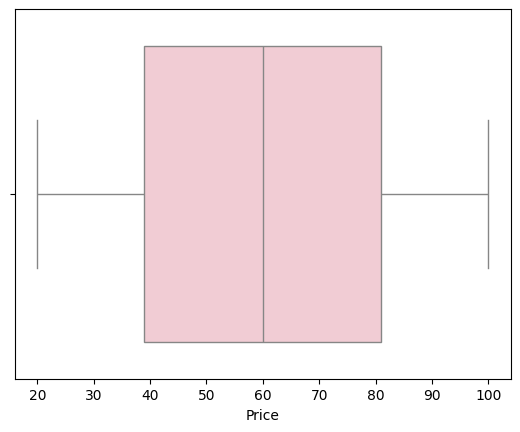

In [ ]:
import seaborn as sns
sns.boxplot(x=df['Price'], color="#F7C6D0")

Below are the libraries that are used in order to perform EDA (Exploratory data analysis) .

The rating distribution graph highlights how customers evaluate their purchases. This information is useful for checking whether subscription members are generally more satisfied.

<Axes: xlabel='Rating'>

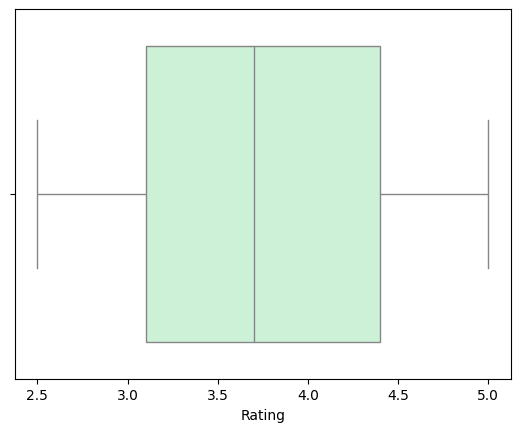

In [ ]:
sns.boxplot(x=df['Rating'], color="#C6F7D4")

The Prev Purchases reveals how many previous purchases customers typically make before their current transaction. This helps us understand the general loyalty level in the dataset, which is important when later comparing whether subscribers tend to buy more frequently.

<Axes: xlabel='Prev_Purchases'>

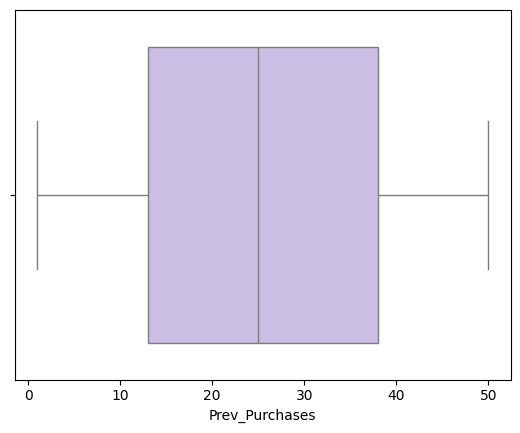

In [ ]:
sns.boxplot(x=df['Prev_Purchases'], color="#C7B8EA")

Looking at the age distribution helps us understand which age groups are most represented in the dataset. Since subscription decisions may vary between younger and older customers

<Axes: xlabel='Age'>

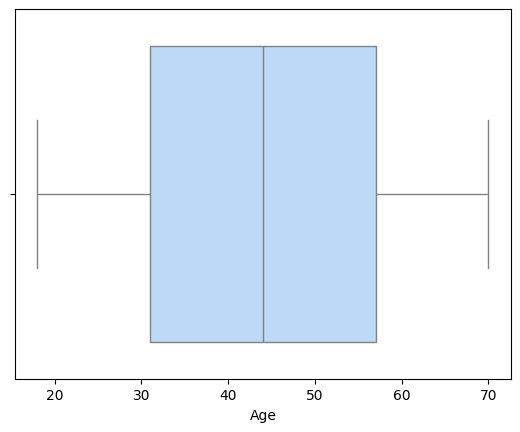

In [ ]:
sns.boxplot(x=df['Age'], color="#B3D9FF")

**F. Visualizing Relationships & Business Insights**
Now that our data is clean and validated (no outliers or missing values), we proceed to the core analysis. In this step, we visualize relationships between variables to answer our initial research questions:
1. Do subscribers spend more?
2. What are the most popular categories?
3. Does subscription affect satisfaction (ratings)?



---



## 9. Bivariate Analysis

In the previous section, we performed **Univariate Analysis** to detect outliers. Now, we move to **Bivariate Analysis** to visualize the relationship between the "Subscription Status" and other key variables (Price, Category, Rating).

**Objective:** To directly answer the research questions by comparing the behavior of loyal subscribers versus regular customers.

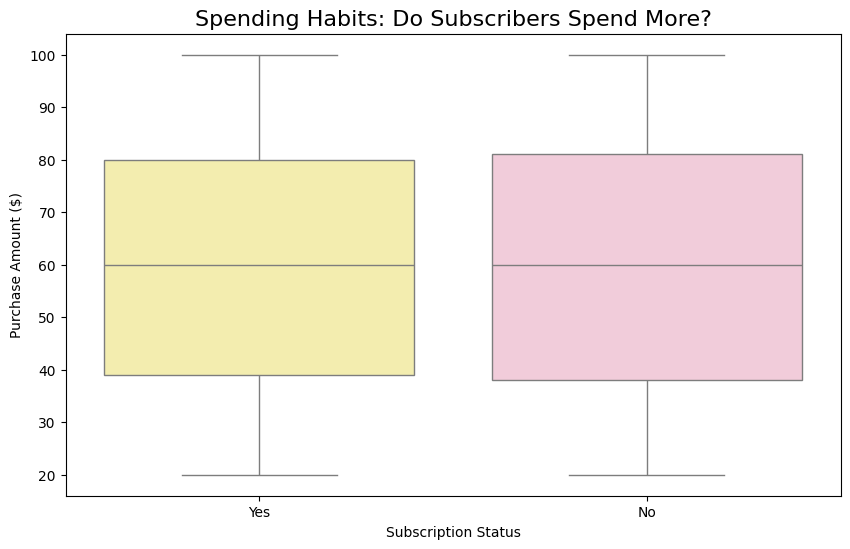

Insight: The median spending is nearly identical for both groups.
This indicates that subscription status does not significantly impact the purchase amount per transaction.
--------------------------------------------------


In [ ]:
import matplotlib.pyplot as plt
# --- Plot 1: Spending Habits (Boxplot) ---
# Objective: Check if subscribers spend more per transaction.
plt.figure(figsize=(10, 6))
# Fixed syntax to avoid warnings: added hue and legend=False
sns.boxplot(x='Subscription', y='Price', data=df, palette=['#FFF6A3', '#F7C6D9'], hue='Subscription', legend=False) # Corrected legend to boolean False

plt.title('Spending Habits: Do Subscribers Spend More?', fontsize=16)
plt.xlabel('Subscription Status')
plt.ylabel('Purchase Amount ($)')
plt.show()

print("Insight: The median spending is nearly identical for both groups.")
print("This indicates that subscription status does not significantly impact the purchase amount per transaction.")
print("-" * 50)

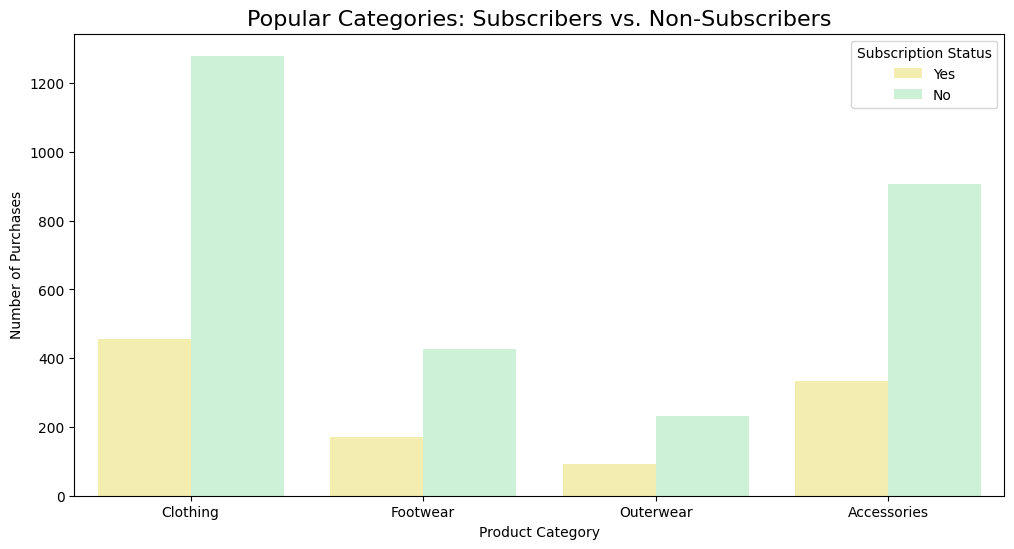

Insight: 'Clothing' is the top-selling category for both groups.
Non-subscribers (purple) significantly outnumber subscribers (yellow) across all categories.
--------------------------------------------------


In [ ]:
# --- Plot 2: Popular Categories (Countplot) ---
# Objective: Compare product preferences.
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', hue='Subscription', data=df, palette=['#FFF6A3',  '#C6F7D4'])
plt.title('Popular Categories: Subscribers vs. Non-Subscribers', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.legend(title='Subscription Status')
plt.show()

print("Insight: 'Clothing' is the top-selling category for both groups.")
print("Non-subscribers (purple) significantly outnumber subscribers (yellow) across all categories.")
print("-" * 50)


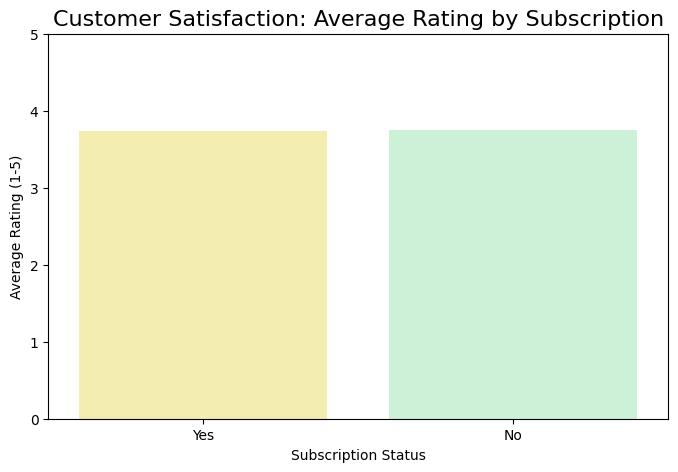

Insight: The average customer satisfaction rating is almost the same for both groups.
This suggests that subscription status may not have a strong impact on customer satisfaction.


In [ ]:
# --- Plot 3: Customer Satisfaction (Barplot) ---
# Objective: Determine if subscribers give higher ratings.
plt.figure(figsize=(8, 5))
# Fixed syntax to avoid warnings
sns.barplot(x='Subscription', y='Rating', data=df, palette=['#FFF6A3',  '#C6F7D4'] ,errorbar=None, hue='Subscription', legend=False)
plt.ylim(0, 5)
plt.title('Customer Satisfaction: Average Rating by Subscription', fontsize=16)
plt.ylabel('Average Rating (1-5)')
plt.xlabel('Subscription Status')
plt.show()

print("Insight: The average customer satisfaction rating is almost the same for both groups.")
print("This suggests that subscription status may not have a strong impact on customer satisfaction.")

### Histogram

Histogram: Distribution of Purchases We plotted a histogram to see the frequency of purchases across different categories.

Insight: We can visualize which categories (Clothing, Footwear, Accessories) are the most popular. This helps the business understand where the highest demand lies.

Heat Maps: Correlation Analysis We used a Heat Map to find correlations between numerical variables (Age, Purchase Amount, Rating, Previous Purchases).

Insight: The heatmap shows generally low correlation between Age and Purchase Amount, suggesting that spending habits are quite similar across different age groups in this specific store. This is a valuable insight, as it implies marketing can be broad rather than age-specific for pricing.

Scatterplot: Age vs. Purchase Amount We plotted Age against Purchase Amount to see if there is a trend (e.g., do older people spend more?).

Insight: The scatter plot shows a uniform distribution, reinforcing our finding that spending is consistent across demographics.

### Heat Maps

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps.

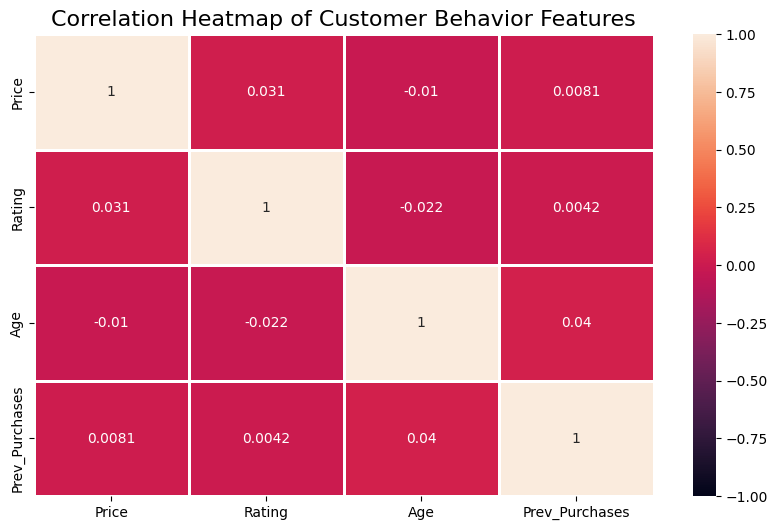

Insight: Correlations between the numerical features are very weak.
This suggests that age, spending, satisfaction, and previous purchases do not strongly influence one another.
In our business problem, these factors cannot explain differences between subscribers and non-subscribers.


In [ ]:
# --- Plot 4: Correlation Heatmap ---
# Objective: Examine how numerical variables relate to each other.

plt.figure(figsize=(10,6))

correlation = df[['Price', 'Rating', 'Age', 'Prev_Purchases']].corr()
pastel_cmap = sns.diverging_palette(350, 120, s=60, l=85, as_cmap=True),
sns.heatmap(
    correlation,
    annot=True,
    linewidths=1,
    linecolor='white',
    vmin=-1,
    vmax=1
)

plt.title('Correlation Heatmap of Customer Behavior Features', fontsize=16)
plt.show()
print("Insight: Correlations between the numerical features are very weak.")
print("This suggests that age, spending, satisfaction, and previous purchases do not strongly influence one another.")
print("In our business problem, these factors cannot explain differences between subscribers and non-subscribers.")


### Scatterplot


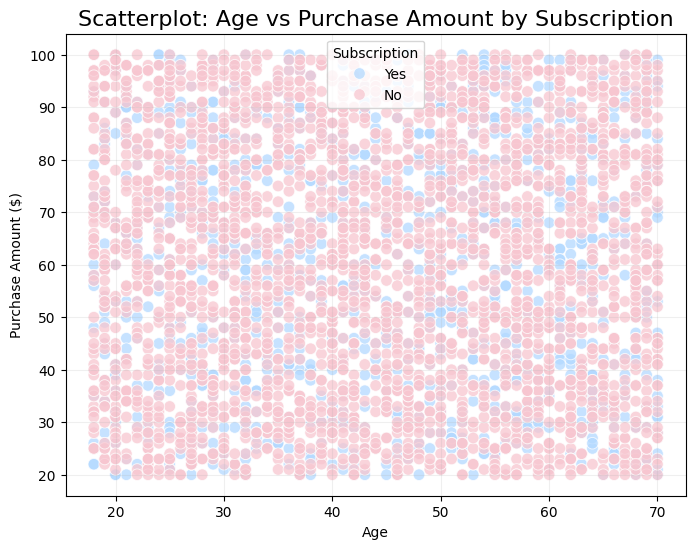

Insight: Purchase amounts appear evenly distributed across different age groups for both subscribers and non-subscribers.
The two groups overlap almost completely, showing no meaningful difference in spending behavior.
Overall, the analysis suggests that neither age nor subscription status has a strong influence on purchase amount.


In [ ]:
# --- Plot 5: Spending Behavior by Age (Scatterplot) ---
#  Objective: Check if age influences how much customers spend and whether subscribers behave differently.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Price', hue='Subscription',
                palette=['#B3D9FF' ,'#F7C6D0' ], s=70, alpha=0.75)
plt.title("Scatterplot: Age vs Purchase Amount by Subscription", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Purchase Amount ($)")
plt.grid(alpha=0.2)
plt.show()
df[['Age', 'Price']].corr()
print("Insight: Purchase amounts appear evenly distributed across different age groups for both subscribers and non-subscribers.")
print("The two groups overlap almost completely, showing no meaningful difference in spending behavior.")
print("Overall, the analysis suggests that neither age nor subscription status has a strong influence on purchase amount.")


### Business Conclusions & Insights

Based on the analysis of the data, we reached the following conclusions regarding the Subscription Model:

**1. Profitability Gap (The "Surprise" Finding)**
* **Observation:** The data reveals that there is **no significant difference** in the Average Purchase Amount between Subscribers (\$59.49) and Non-Subscribers (\$59.86).
* **Conclusion:** Currently, the "Subscription Status" does not drive higher spending per transaction. The loyal customers are visiting, but they are not spending more than regular walk-in customers.
* **Recommendation:** The company needs to restructure the subscription benefits. Instead of just "free shipping" or "updates", we should offer **volume-based discounts** (e.g., "Save 10% when you spend over \$80") to incentivize larger basket sizes specifically for subscribers.

**2. Market Penetration**
* **Observation:** Only **27%** of our customers are currently subscribed.
* **Conclusion:** There is a massive untapped potential (73% of customers) to convert into the loyalty program.
* **Recommendation:** Launch a targeted sign-up campaign at the checkout, highlighting the new volume-based benefits.

**3. Product Strategy**
* **Observation:** "Clothing" is the top-selling category for **both groups**.
* **Recommendation:** Since clothing is our strongest draw, any new exclusive deals for subscribers should focus on this category (e.g., "Subscribers get early access to the Winter Clothing Collection").

---
**Final Summary:**
The Subscription Program effectively retains customers (27% base) but fails to increase their individual monetary value. The strategy must shift from "Passive Loyalty" to "Incentivized Spending".

**Conclusion:**
We have successfully cleaned and explored the Shopping Behavior dataset. The data is high-quality (no nulls/duplicates), and we have identified key characteristics of our customers. We are now ready to proceed to deeper analysis or modeling.


## Thank you.